In [1]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import platform

In [2]:
filename = 'html1.txt'
html1 = open(filename, 'r')

code_list = []

total_soup = BeautifulSoup(html1, 'html.parser')
ul = total_soup.find('ul', {'class' : 'List_List__Ni_dK'})

for i in ul.find_all('button'):
    code_list.append(i.attrs['data-position-id'])

len(code_list)

742

In [3]:
preferred_list = []

for i in range(len(code_list)):
    url = 'https://www.wanted.co.kr/wd/' + code_list[i]
    headers = {
        'User-Agent': 'Mozilla/5.0',
        'Referer': 'https://www.google.com'
    }

    response = requests.get(url, headers=headers)

    soup = BeautifulSoup(response.text, 'html.parser')

    text = soup.get_text()
    start = text.find('"preferred_points":"')
    end = text.find(',"benefits":"')
    text1 = text[start:end].replace('\n', ' ')
    text2 = text1.replace('\\n-', '')
    text3 = text2.replace('\\\n•', '')
    text4 = text3.replace('\\\n', '')
    text5 = text4.replace('\\n•', '')
    text6 = text5.replace('\\n', '')
    
    preferred_list.append(text6[22:-1])

KeyboardInterrupt: 

In [ ]:
preferred_list

['MLOps 관련  프로젝트  경험이  있으신  분 대규모  데이터  처리  경험이  있으신  분 온/오프라인  학습  서비스의  사용자  경험(튜터 / 학생  무관)이  있으신  분',
 '멀티모달 AI 모델  관련  프로젝트  경험이  있으신  분 대규모  데이터  처리  경험이  있으신  분 온/오프라인 학습 서비스의 사용자 경험(튜터 / 학생 무관)이 있으신 분',
 '',
 'Python, C++,C# 언어 중 숙련자 새로운 기술을 익히는데 거부감이 없으신 분 CAN, Automotive Ethernet 등의 차량 프로토콜이나 차량 도메인 지식이 있으신 분',
 'Pytorch Lightning 라이브러리에 익숙하신 분 Data centric 모델 optimization 경혐이 있으신 분 클라우드 기반(AWS, Kafka, Kubeflow)의 대규모 ML 학습/인퍼런스 인프라 세팅 경험이 있으신 분 Docker 컨테이너 기반 CI/CD Kubernetes 배포 가능하신 분 협업을 좋아하시는 분',
 '컴퓨터 과학 또는 관련 분야 석사 이상 사용 서비스 개발 및 운영 경험 Google Map/Naver Map API 사용 경험 iOS 또는 Android 네이티브 개발 경험 Node.js 및 Express.js 같은 백엔드 기술에 대한 경험 애자일 개발 방법론에 대한 이해 및 경험 UI/UX 디자인에 대한 감각 및 경험 효과적인 커뮤니케이션 능력 및 팀워크',
 '헬스케어 분야에서 실무 경험 있으신 분 AI 분야 SCI급 논문이 있으신 분  영어 의사소통에 막힘이 없으신 분  Kaggle 등 competition 입상 경험이 있으신 분',
 '이커머스 관련 분야 업무 경험이 있으신 분 마케팅 솔루션, 마케팅 분야 업무 경험이 있으신 분 AWS, GCP 등의 클라우드 서비스 개발 경험이 있으신 분 LLM을 활용하여 서비스 개발 경험이 있으신 분 Spark 활용한 분산 병렬 처리 프레임워크 경험이 있으신 분 Kaggle 대회 입상자',
 '행동 트리(Beh

In [ ]:
file_name = 'word_cloud.txt'

with open(file_name, 'w') as file:
    file.write('\n'.join(preferred_list))

['MLOps', '관련', '프로젝트', '경험', '있으신', '분', '대규모', '데이터', '처리', '경험', '있으신', '분', '온', '오프라인', '학습', '서비스', '사용자', '경험', '튜터', '학생', '무관', '이', '있으신', '분', '멀티', '달', 'AI', '모델', '관련', '프로젝트', '경험', '있으신', '분', '대규모', '데이터', '처리', '경험', '있으신', '분', '온', '오프라인', '학습', '서비스', '사용자', '경험', '튜터', '학생', '무관', '이', '있으신', '분', 'Python', 'C', 'C', '언어', '중', '숙련', '새로운', '기술', '거부', '감', '없으신', '분', 'CAN', 'Automotive', 'Ethernet', '등', '차량', '프로토콜', '차량', '도메인', '지식', '있으신', '분', 'Pytorch', 'Lightning', '라이브러리', '익숙하신', '분', 'Data', 'centric', '모델', 'optimization', '경혐', '있으신', '분', '클라우드', '기반', 'AWS', 'Kafka', 'Kubeflow', '의', '대규모', 'ML', '학습', '인퍼런스', '인프라', '세팅', '경험', '있으신', '분', 'Docker', '컨테이너', '기반', 'CI', 'CD', 'Kubernetes', '배포', '가능하신', '분', '협업', '좋아하시는', '분', '컴퓨터', '과학', '관련', '분야', '석사', '이상', '사용', '서비스', '개발', '및', '운영', '경험', 'Google', 'Map', 'Naver', 'Map', 'API', '사용', '경험', 'iOS', 'Android', '네이티', '브', '개발', '경험', 'Node', 'js', '및', 'Express', 'js', '같은', '백엔드', '기술', '대

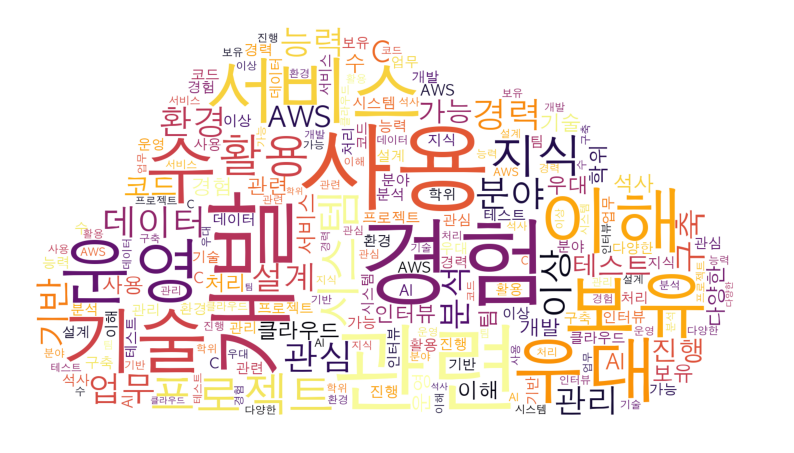

In [14]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import platform
import numpy as np
from PIL import Image

text = open('word_cloud.txt', encoding='utf-8').read()
okt = Okt() # Open Korean Text 객체 생성

# okt함수를 통해 읽어들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = okt.pos(text)

noun_adj_list = []
# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun', 'Adjective', 'Alpha']:
        noun_adj_list.append(word)

print(noun_adj_list)
# 가장 많이 나온 단어부터 50개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(50)
print(tags)

# 한글을 분석하기위해 font를 한글로 지정, macOS는 .otf, windows는 .ttf 파일의 위치를 지정
if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    font = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

dict_tag = dict(tags)

stopword_list = ['분', '있으신', '및', '등', '대한', '있는', '를', '것']

for i in stopword_list:
    del dict_tag[i]

img_mask = np.array(Image.open('cloud.png'))
wc = WordCloud(font_path = path, width = 400, height = 400,
                background_color='white', max_font_size=200,
                repeat=True, colormap = 'inferno', mask = img_mask)

cloud = wc.generate_from_frequencies(dict_tag)
# 생성된 WordCloud를 test.jpg로 보낸다.
# cloud.to_file('text.jpg')
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()